In [ ]:
# data downloaded at: https://github.com/CLARIAH/wp6-missieven/tree/d4a1683f62c987cb4454c8614059a0036d623fec/xml
# you can skip this step and use the tsv file we provide: data/all_letters.tsv

In [1]:
! pip install beautifulsoup4
! pip install lxml

In [2]:
from bs4 import BeautifulSoup,NavigableString

# with open("p0003a.xml") as fp:
#     soup = BeautifulSoup(fp, 'xml')

In [3]:
def show_head(path):
    with open(path) as fp:
        soup = BeautifulSoup(fp, 'xml')
        return soup.findAll('body')[0].findAll('head')[0].text.replace('\n',' ')

In [4]:
soup = BeautifulSoup('<div><b>ignore this</b>get this</div>')
soup.div.find(text=True, recursive=False)

'get this'

In [5]:
def meta_to_dict(tags_list):
    return {
        item.attrs['key']: item.attrs['value']
        for item in tags_list
    }

In [6]:
def nice_paragraph(para):
    return ' '.join([s for s in para.stripped_strings])

In [7]:
def nice_remark(remark):
    return ' '.join([s for s in remark.stripped_strings])

In [8]:
def show_letter(path):
    with open(path) as fp:
        soup = BeautifulSoup(fp, 'lxml')

        meta_dict = meta_to_dict(soup.findAll('meta'))
        text = "\n".join([nice_paragraph(para) for para in soup.findAll('para')] + [nice_remark(remark) for remark in soup.findAll('remark')])
        meta_dict['text'] = text
        return meta_dict

In [1]:
#show_letter('01/p0004.xml') # todo add absolute path

In [10]:
import glob

In [11]:
b1_fps = glob.glob('01/*')

In [12]:
len(b1_fps)

102

In [13]:
b1_fps[:20]

['01/p0097c.xml',
 '01/p0003b.xml',
 '01/p0658.xml',
 '01/p0076.xml',
 '01/p0507.xml',
 '01/p0077.xml',
 '01/p0063.xml',
 '01/p0003c.xml',
 '01/p0097b.xml',
 '01/p0303.xml',
 '01/p0003a.xml',
 '01/p0129.xml',
 '01/p0074.xml',
 '01/p0302.xml',
 '01/p0097a.xml',
 '01/p0097e.xml',
 '01/p0070.xml',
 '01/p0663.xml',
 '01/p0105.xml',
 '01/p0097d.xml']

In [14]:
from os.path import splitext

def remove_ext(filename):
    root, ext = splitext(filename)
    return root
    
# these tests should return True if my code is correct
print(remove_ext("01/p0098a.xml") == '01/p0098a')

True


In [15]:
from os.path import basename

def remove_dir(filepath):
    return basename(filepath)
    
print(remove_dir("01/p0098a.xml") == 'p0098a.xml')

True


In [16]:
def remove_dir_ext(filepath):
    no_ext = remove_ext(filepath)
    base = remove_dir(no_ext)
    return base
    
print(remove_dir_ext("01/p0098a.xml") == 'p0098a')

True


In [ ]:
b1_fps = glob.glob('01/*')

In [17]:
b1_filepaths = sorted(b1_fps,key=remove_dir_ext)
b1_filepaths[:20]

['01/p0003a.xml',
 '01/p0003b.xml',
 '01/p0003c.xml',
 '01/p0004.xml',
 '01/p0007.xml',
 '01/p0008.xml',
 '01/p0016a.xml',
 '01/p0016b.xml',
 '01/p0017.xml',
 '01/p0018.xml',
 '01/p0019.xml',
 '01/p0020a.xml',
 '01/p0020b.xml',
 '01/p0020c.xml',
 '01/p0021.xml',
 '01/p0027a.xml',
 '01/p0027b.xml',
 '01/p0028.xml',
 '01/p0029.xml',
 '01/p0033.xml']

In [59]:
for filepath in b1_filepaths:
    print(show_letter(filepath))

{'page': '3', 'title': 'Both; aan boord van het Wapen van Amsterdam voor Ile de Mayo, 25 februari 1610', 'rawdate': '25 februari 1610', 'seq': 'I', 'place': 'aan boord van het Wapen van Amsterdam voor Ile de Mayo', 'year': '1610', 'month': '2', 'day': '25', 'author': 'Both', 'pid': '', 'status': '', 'authorFull': 'Pieter Both', 'text': '«Scheepshericht, vnl. handelend over uitgedeelde straffen »'}
{'page': '3', 'title': 'Both; aan boord van het Wapen van Amsterdam liggende in de Tafelbaai, 6 augustus 1610', 'rawdate': '6 augustus 1610', 'seq': 'II', 'place': 'aan boord van het Wapen van Amsterdam liggende in de Tafelbaai', 'year': '1610', 'month': '8', 'day': '6', 'author': 'Both', 'pid': '', 'status': '', 'authorFull': 'Pieter Both', 'text': '«„Journaelsgewijse" reisbeschrijving »'}
{'page': '3', 'title': 'Both; aan boord van het Wapen van Amsterdam ter Rede van Mauritius, 14 oktober 1610', 'rawdate': '14 oktober 1610', 'seq': 'III', 'place': 'aan boord van het Wapen van Amsterdam ter

{'page': '152', 'title': 'De Carpentier, Specx, Vlack, Van Diemen; Batavia, 27 januari 1625', 'rawdate': '27 januari 1625', 'seq': 'VI', 'year': '1625', 'month': '1', 'day': '27', 'author': 'De Carpentier, Specx, Vlack, Van Diemen', 'pid': '', 'place': 'Batavia', 'status': '', 'authorFull': 'Pieter de Carpentier, Jacques Specx Dr, Pieter Vlack, Antonio van Diemen', 'text': "Den Coningh van Visiapour, den gouverneur ende verscheyden groote van Suratte mitsgaders de Dabulders Dabul, plaats aan de westkust van India, 18° N.B., 73° O.L., in Bijapur, was inde 17de eeuw een belangrijke handelsplaats. Met Dabul was men in onvrede geraakt wegens het aan- en leeghalen van schepen van inwoners van deze stad, die uit Mokka kwamen (Vgl. Coen VII, p. 830 en W ester kwartieren, p. 80), omdat zij vrienden van de Portugezen waren. selve houden seer hard aen, dat wij met Dabull bevredigen wilden, insonderheyt dewijle den Coningh van Visiapour, onder wien oock Dabul sorteert, nu onlangx tributaris van d

{'page': '369', 'title': 'Brouwer, Vlack, Ysbrantsz, Van der Burch; Batavia, 8 februari 1633', 'rawdate': '8 februari 1633', 'seq': 'III', 'year': '1633', 'month': '2', 'day': '8', 'author': 'Brouwer, Vlack, Ysbrantsz, Van der Burch', 'pid': '', 'place': 'Batavia', 'status': '', 'authorFull': 'Henrick Brouwer Dr, Pieter Vlack, Maerten Ysbrantsz, Jan van der Burch', 'text': '1018, f. 9-10 (potlood), 2e exemplaar f. 221-223 (potlood), 3e exemplaar, gedateerd 7 febr. 1633 en gaande tot: naar Japan te gebruiken f. 200-201 (potlood).\nNaerdat wij deesen mergen onse nevensgaende missive aen UE. hadden affgesonden met ons Bantams convoyjacht Negepatnan om door d’heere mr. Hoar William Hoare kwam in 1618 als koopman van de Engelse Compagnie te Suratte en werd in 1620 naar Engeland gezonden om te rapporteren over het nemen van Engelse schepen door Nederlanders in het begin van dat jaar. In 1622 maakte hij een reis naar Mokka; hij was in 1623 pakhuismeester te Suratte. Hij repatrieerde 1626 en k

{'page': '596', 'title': 'Van Diemen, Lucasz, Gijsels, Caen; Batavia, 9 december 1637', 'rawdate': '9 december 1637', 'seq': 'III', 'year': '1637', 'month': '12', 'day': '9', 'author': 'Van Diemen, Lucasz, Gijsels, Caen', 'pid': '', 'place': 'Batavia', 'status': '', 'authorFull': 'Antonio van Diemen, Philips Lucasz, Artus Gijsels, Antonio Caen', 'text': "Sulckx dat wij uyt allen desen beslnyten, geseyde vlote gesepareert op onse landen sal wesen verschenen ende den gouverneur Putmans met Banda, Swol, Seelandia ende Aemelia in ’t eerste der maendt augusty, mitsgaders Zutphen, Leeuwaerden ende N.-Enckhuysen in september daeraenvolgende behouden ter gedestineerde havens sullen sijn aengecomen, dat Godt gunne ende ons tegen maert off primo april aenstaende seer lieff te verstaen sal wesen nevens de bevindingh der ingeladen cargasoenen, die wij vertrouwen, een redelijcke merckt sullen hebben beloopen ende principalijck den peper, de suyckeren, caneel, lijwaten etc. ten opsichte van de Brasi

In [136]:
book_dfs = []

for i in range(14):
    booknum = str(i+1)
    if i+1 < 10:
        booknum = '0'+booknum
    print(booknum)
    filepaths = glob.glob(booknum+'/*')
    filepaths = sorted(filepaths,key=remove_dir_ext)

    book = [show_letter(filepath) for filepath in filepaths]
    book_df = pd.DataFrame.from_records(book)
    book_dfs.append(book_df)
# book_dfs[-1]

01
02
03
04
05
06
07
08
09
10
11
12
13
14


In [137]:
type(book_dfs)

list

In [118]:
for i, book_df in enumerate(book_dfs):
    book_df.to_csv('book{0}.tsv'.format(i+1),sep='\t')

In [128]:
for i, book_df in enumerate(book_dfs):
    book_df.to_csv('book{0}.tsv'.format(i+1))

In [138]:
big_df = pd.concat(book_dfs)
big_df

,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2,25,Both,,,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8,6,Both,,,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10,14,Both,,,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7,18,Both,,,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3,31,Both,,,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12,31,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",,,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN
14,0883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4,8,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",,,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN
15,0893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10,21,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",,,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN
16,0943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12,31,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",,,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN


In [139]:
big_df.to_csv('data/all_letters.tsv',sep='\t')

In [140]:
big_df['rawdate'].describe()

count              607
unique             567
top       26 juli 1612
freq                 7
Name: rawdate, dtype: object

In [145]:
big_df['place'].value_counts()

Batavia                                                           555
Bantam                                                             14
Kasteel Jakatra                                                    12
Fort Mauritius nabij Ngofakiaha op het eiland Makéan                7
Kasteel Nassau op Banda-Neira                                       2
                                                                    2
Ternate                                                             2
aan boord van het Wapen van Amsterdam voor Ile de Mayo              1
Kasteel Mauritius nabij Ngofakiaha op Makéan                        1
aan boord van de Wesel in Straat Sunda                              1
in het Schip Deventer nabij de zuidpunt van Afrika                  1
Schip Nieuw Hollandia ter Rede van Banda-Neira                      1
Amboina                                                             1
Wapen van Amsterdam voor Banda-Neira                                1
Jakatra             

<AxesSubplot:>

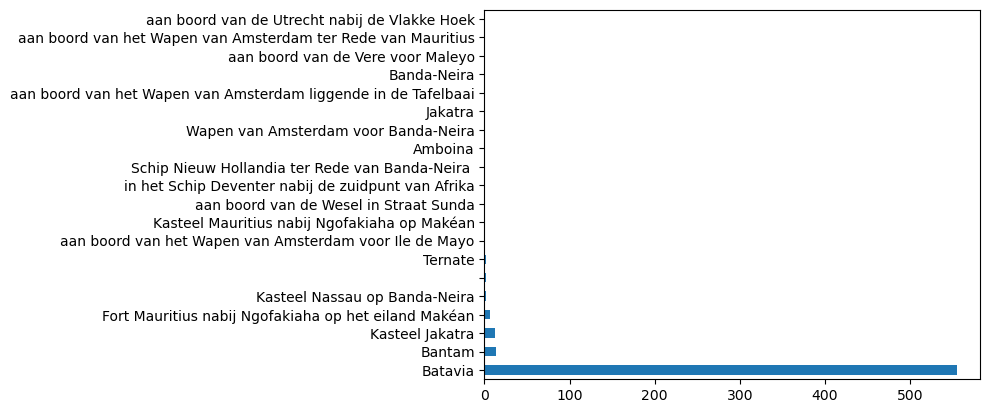

In [141]:
big_df['place'].value_counts().plot.barh()

In [123]:
import seaborn as sns

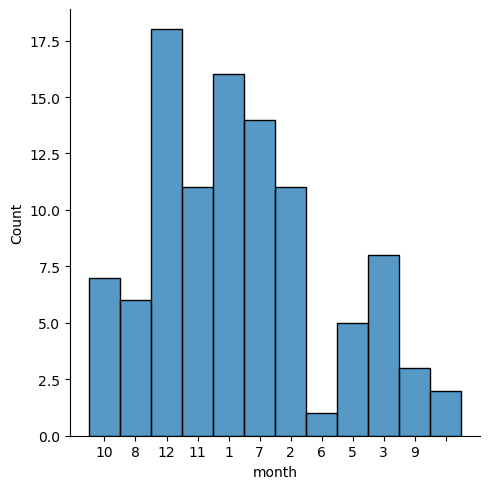

In [114]:
sns.displot(x='month', data=book_dfs[0])

In [146]:
big_df['authorFull'].value_counts()

Pieter Both                                                                                                                                                                                                                      22
Joan Maetsuycker, Nicolaes Verburch, Laurens Pit, Pieter Overtwater, Cornelis Speelman, Pieter van Hoorn                                                                                                                         14
Laurens Reael                                                                                                                                                                                                                    11
Diderik Durven, Cornelis Hasselaar, Wijbrant Blom, Joan Everard van der Schuer, Michiel Westpalm, Hendrik van Baerle, Joan François de Witte, Van Schooten, Rogier Thomas van Heyningen, Herman van Bayen, Adriaan Oostwalt       9
Antonio van Diemen, Cornelis van der Lijn, Joan Maetsuycker, Justus Schouten, Salomon Sw

<AxesSubplot:>

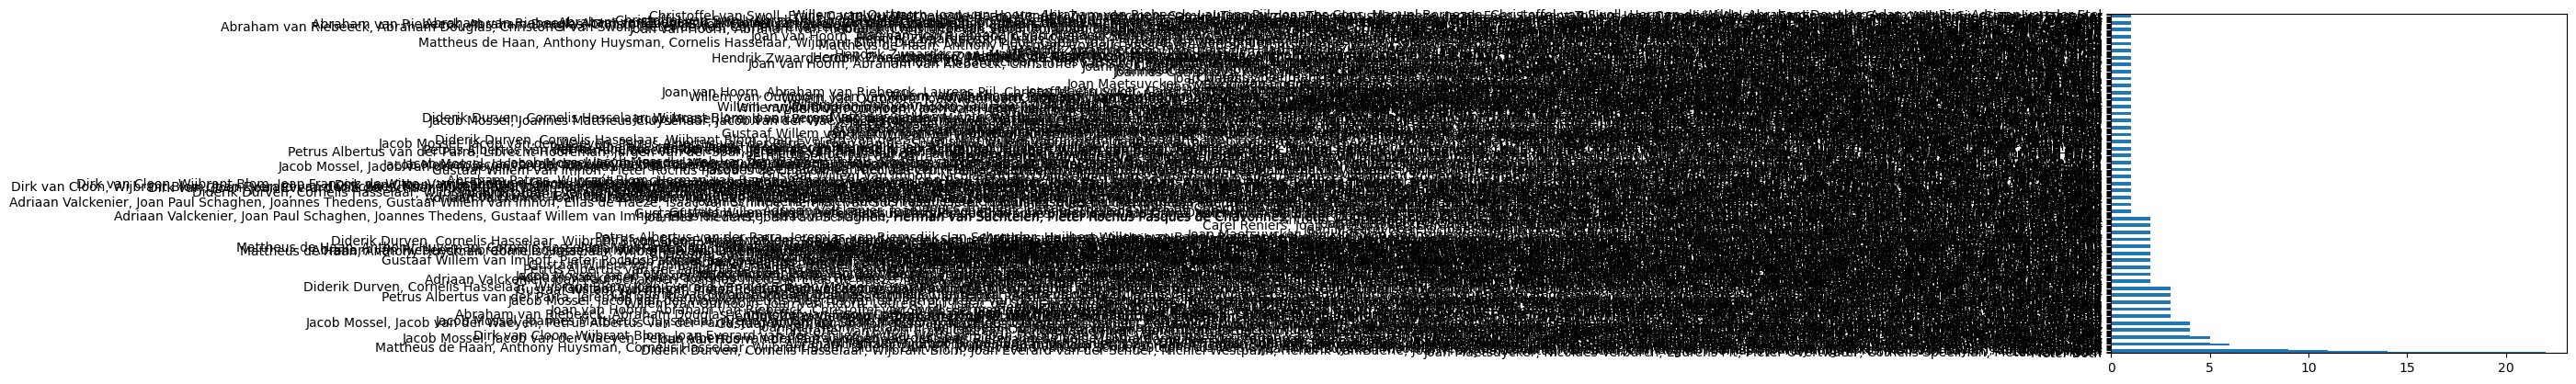

In [147]:
big_df['authorFull'].value_counts().plot.barh()

In [148]:
big_df.loc[big_df['authorFull'] == 'Pieter Both' ]

,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2,25,Both,,,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8,6,Both,,,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10,14,Both,,,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7,18,Both,,,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3,31,Both,,,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
5,8,Both; Fort Mauritius nabij Ngofakiaha op het e...,26 juli 1612,VI,Fort Mauritius nabij Ngofakiaha op het eiland ...,1612,7,26,Both,,,Pieter Both,"Mijn Heeren, tsedert het vertreck van ons schi...",NaN
6,16,Both; Fort Mauritius nabij Ngofakiaha op het e...,26 juli 1612,VII,Fort Mauritius nabij Ngofakiaha op het eiland ...,1612,7,26,Both,,,Pieter Both,«Gegevens betreffende Apollonius Schotte »,NaN
7,16,Both; Fort Mauritius nabij Ngofakiaha op het e...,26 juli 1612,VIII,Fort Mauritius nabij Ngofakiaha op het eiland ...,1612,7,26,Both,,,Pieter Both,"«Gegevens over Jacques VHermite, klachten over...",NaN
8,17,Both; Fort Mauritius nabij Ngofakiaha op het e...,26 juli 1612,IX,Fort Mauritius nabij Ngofakiaha op het eiland ...,1612,7,26,Both,,,Pieter Both,"Mijn advys soude wesen, dat U.Ed. aldaer een g...",NaN
9,18,"Both; zonder plaats, zonder datum",,X,,,,,Both,,,Pieter Both,«Over particuliere handel van Jacques VHermite »,NaN
